In [1]:
#import moduel
import numpy as np
import copy, math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
np.random.seed(2290) #400132290

In [2]:
#generate data
def func(x):
    return np.sin(4 * np.pi * x + np.pi/2)

def generate_data(p):    
    #generate sets
    X_train = np.linspace(0.,1.,p)
    X_valid = np.linspace(0.,1.,p*10)
    #this is the label y, this this case it is t = sin(4*pi*x)
    # t_train = func(X_train) + 0.3*np.random.randn(12)
    # t_valid = func(X_valid) + 0.3*np.random.randn(120)

    mean = 0
    variance = 0.0625
    # noise = np.random.normal(mean, np.sqrt(variance), size=(10,))
    t_train = func(X_train) + np.random.normal(mean, np.sqrt(variance), size=(p,))
    t_valid = func(X_valid) + np.random.normal(mean, np.sqrt(variance), size=(p*10,))
    
    return X_train,X_valid,t_train,t_valid

def generate_matrix(x_train,t_train,x_valid,t_valid,exp):
    xx_train = x_train[:,np.newaxis] ** [i for i in range(exp+1)]
    xx_valid = x_valid[:,np.newaxis] ** [i for i in range(exp+1)]

    tt_train = t_train[:,np.newaxis]
    tt_valid = t_valid[:,np.newaxis]
    # tt_train = np.array(tt_train)
    # tt_valid = np.array(tt_valid)

    return xx_train,xx_valid,tt_train,tt_valid

#def apply_scaling():
    

In [3]:
#training model
def train(X, t_train):
    #w = (x^T * x)^-1 * (x^T * t)
    w = np.linalg.inv(X.T @ X) @ (X.T @ t_train)
    return w

def train_regulation(X,t_train,B):
    w = np.linalg.inv(X.T @ X + B) @ (X.T @ t_train)
    return w

def pred(X, w):
    pred = (w * X).sum(axis=1, keepdims=True)
    return pred

In [4]:
#calc error
def calc_error(w,x_train,t_train,x_valid,t_valid):
    # pred : w*x = y
    # (y - t)^T (y - t) N
    training_error = np.sum(np.square( (pred(x_train,w)- t_train) )) / t_train.shape[0]
    valid_error = np.sum(np.square( (pred(x_valid,w)- t_valid) )) / t_valid.shape[0]

    return training_error, valid_error

def calc_error_regulation(w, x_train, t_train, x_valid, t_valid, lamda):
    training_error, valid_error = calc_error(w, x_train, t_train, x_valid, t_valid)
    training_error += lamda * np.sum(np.square(w))
    valid_error += lamda * np.sum(np.square(w))

    return training_error,valid_error


In [5]:
#plot
def plot_data(idx, t_pred, x_train, t_train, x_valid, t_valid, reg=False):
    # create a new figure per model
    fig = plt.figure(idx)
    fig.suptitle(f"{'Lambda=' if reg else 'Degree '}{idx}")

    # plot the training and validation data
    plt.plot(x_train, t_train, '.', color="blue", label="Training data", mfc="none")
    plt.plot(x_valid, t_valid, '.', color="red", label="Validation data", mfc="none")

    # plot the model function and the true function
    plt.plot(x_valid, func(x_valid), color="black", label="f_true")
    plt.plot(x_valid, t_pred, color="lightgreen", label="f_pred")

    # label the axies
    plt.xlabel("x")
    plt.ylabel("t")
    
    # show the figure
    plt.legend(loc="best")
    plt.show(block=False)

def plot_error_curves(x_train, t_train, t_valid):
    # create a new figure per model
    fig = plt.figure()
    fig.suptitle(f"Errors")

    # plot the training and validation data
    plt.plot(x_train, t_train, '-', color="blue", label="Training data", mfc="none")
    plt.plot(x_train, t_valid, '-', color="red", label="Validation data", mfc="none")

    # show the figure
    plt.legend(loc="best")
    plt.show(block=False)

[0.23518058]
Degree 0: training error =     0.6589533769089917, validation error = 0.6568628100210282


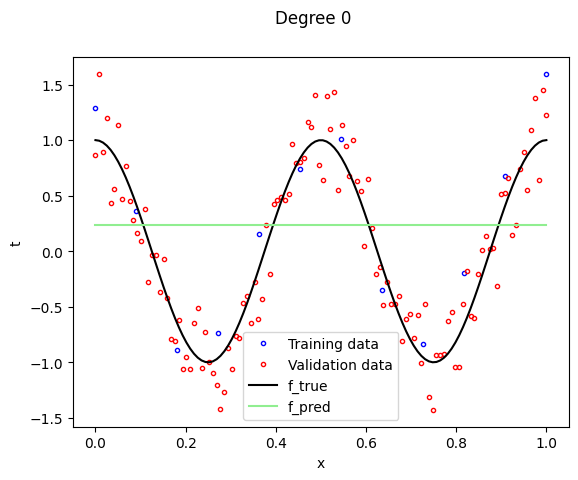

[0.05750249 0.35535619]
Degree 1: training error =     0.6465169047840181, validation error = 0.6599554625193297


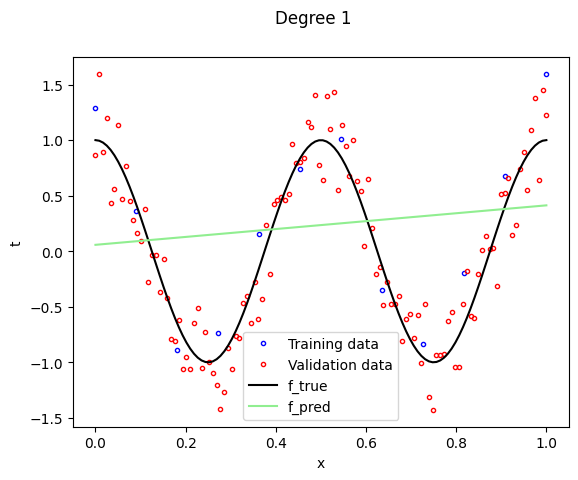

[ 0.76663091 -4.32489139  4.68024758]
Degree 2: training error =     0.4801149272975697, validation error = 0.6343684368763457


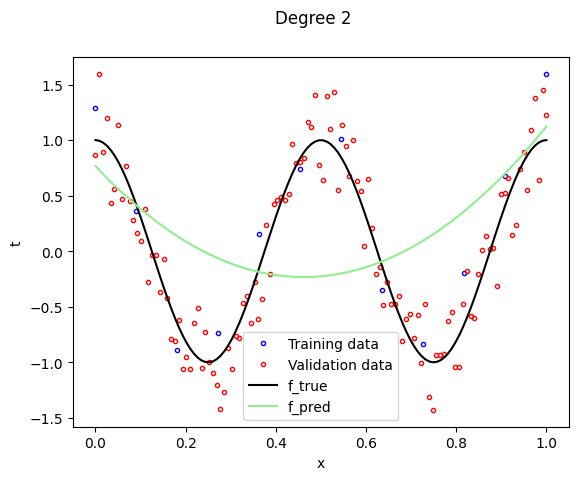

[ 0.73569956 -3.84717396  3.43268336  0.83170948]
Degree 3: training error =     0.4797380265464926, validation error = 0.6346290934617433


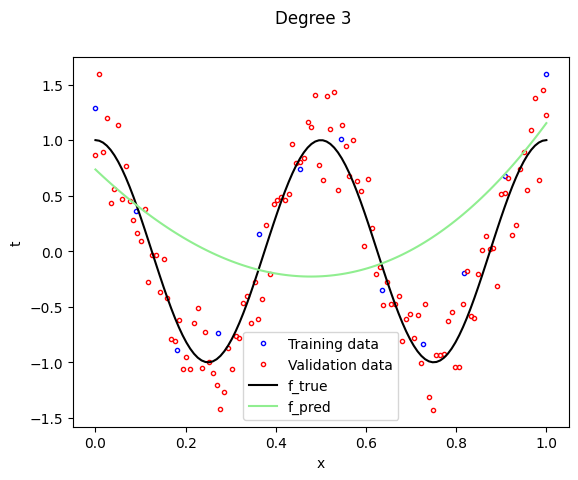

[   1.43569686  -26.73319674  116.90030098 -180.33148019   90.58159483]
Degree 4: training error =    0.17947098410994322, validation error = 0.2601300376862252


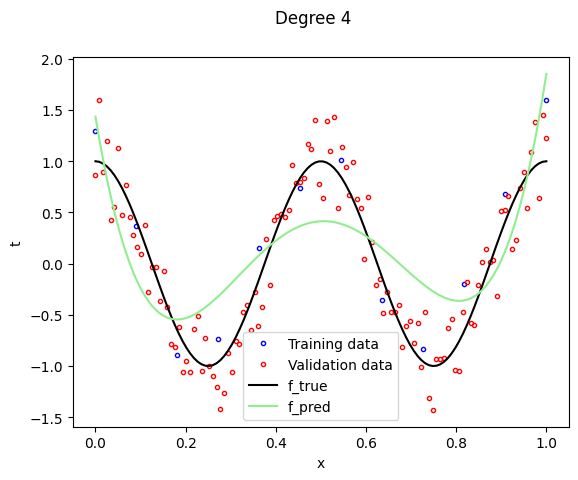

[   1.52322971  -32.85125678  166.768496   -320.37431695  250.77765495
  -64.07842405]
Degree 5: training error =    0.17014149636522205, validation error = 0.27755438870379867


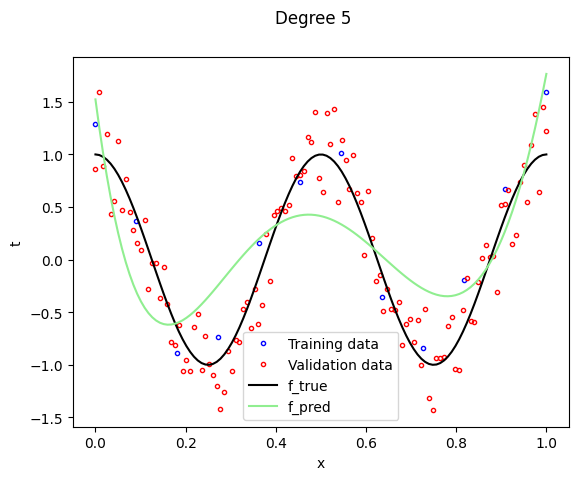

[ 1.30924963e+00  2.33776788e+00 -2.61613092e+02  1.51900739e+03
 -3.30140466e+03  3.09491132e+03 -1.05299658e+03]
Degree 6: training error =     0.0286165728004393, validation error = 0.14150896932822393


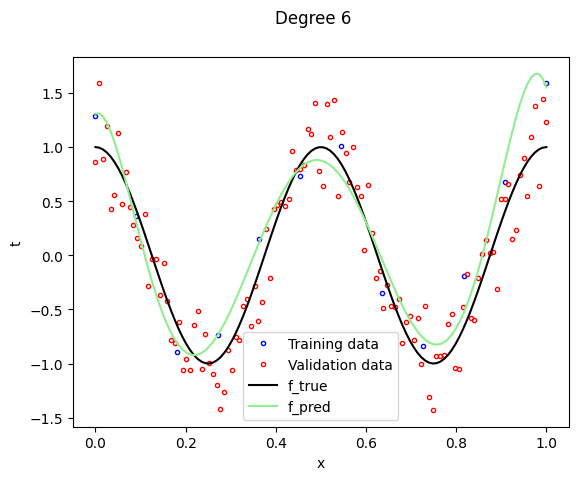

[ 1.28291217e+00  1.45687191e+01 -4.66132004e+02  2.74483728e+03
 -6.78901007e+03  8.19671249e+03 -4.75975558e+03  1.05907400e+03]
Degree 7: training error =   0.021555492734786273, validation error = 0.145747384511194


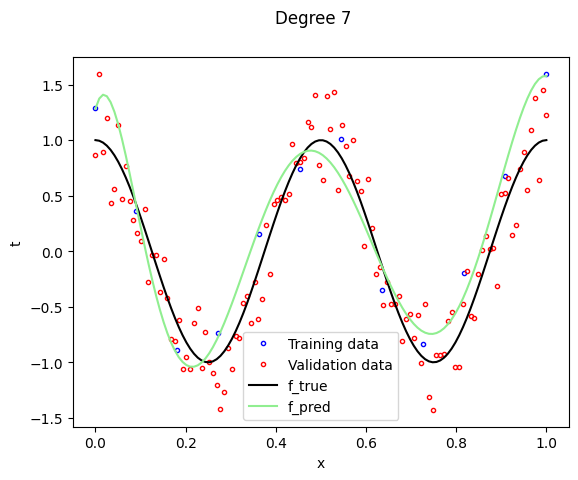

[ 1.29607600e+00 -8.09146979e+00  1.44715388e+01 -9.98289515e+02
  7.60963118e+03 -2.21209174e+04  3.08213470e+04 -2.07768327e+04
  5.45897615e+03]
Degree 8: training error =   0.013772998229578094, validation error = 0.1070426343820808


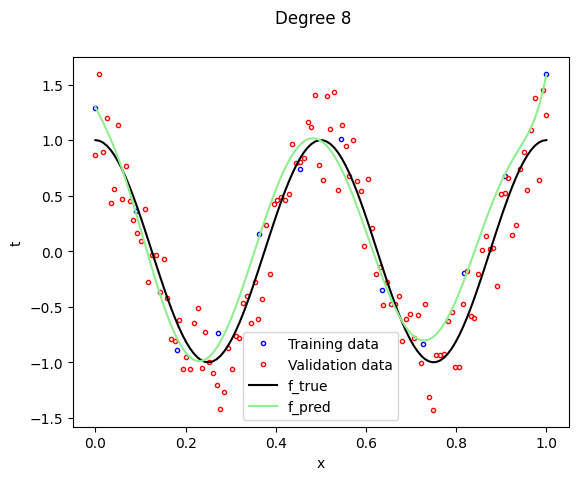

[ 1.29143556e+00  3.47748272e+01 -1.06224656e+03  9.26668247e+03
 -4.24698980e+04  1.17688036e+05 -2.01561383e+05  2.06483281e+05
 -1.15189748e+05  2.68108045e+04]
Degree 9: training error =   0.007643504020007825, validation error = 0.14017734046459793


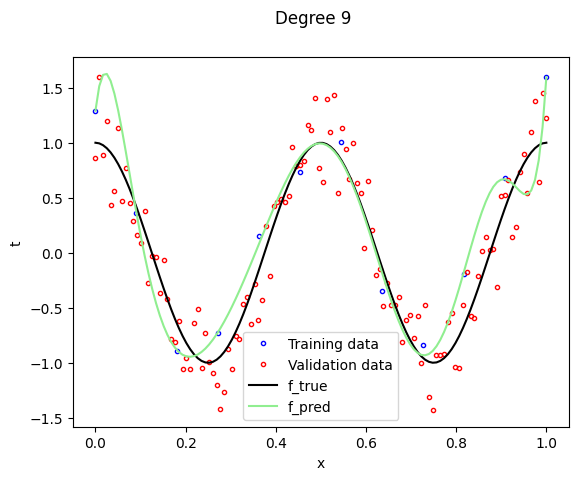

[ 1.29711445e+00  7.43822465e+01 -2.18604605e+03  2.17739703e+04
 -1.16060606e+05  3.74491246e+05 -7.59987469e+05  9.70772391e+05
 -7.55053633e+05  3.26026371e+05 -5.98503203e+04]
Degree 10: training error =   0.006879963024276793, validation error = 0.17187346749730031


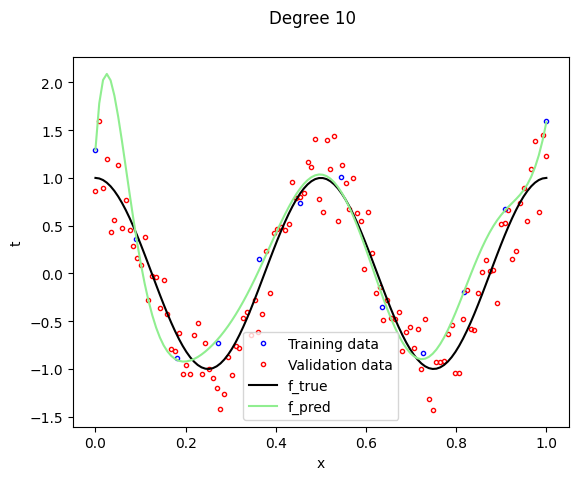

[ 1.16925074e+00  1.31017227e+01 -2.83469971e+02 -2.45182422e+03
  5.24045938e+04 -3.41658875e+05  1.20312025e+06 -2.57054800e+06
  3.42221700e+06 -2.77355300e+06  1.25226300e+06 -2.41522094e+05]
Degree 11: training error =   0.018620907611730412, validation error = 0.1917579934745309


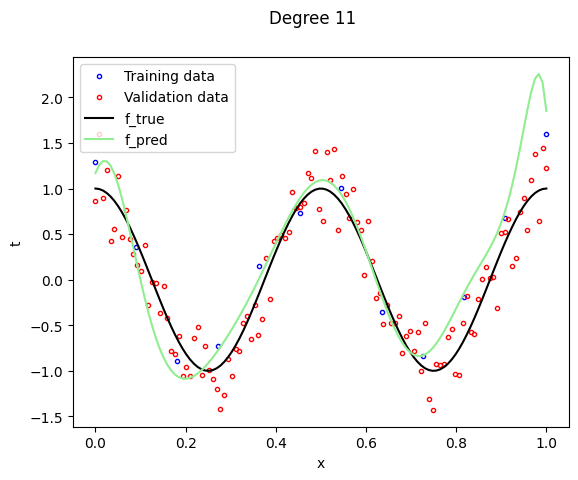

The lowest training error was at degree 10 and the lowest validation error was at degree 8
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
The lowest regularised validation error was at constant 2.7894680928689246e-10


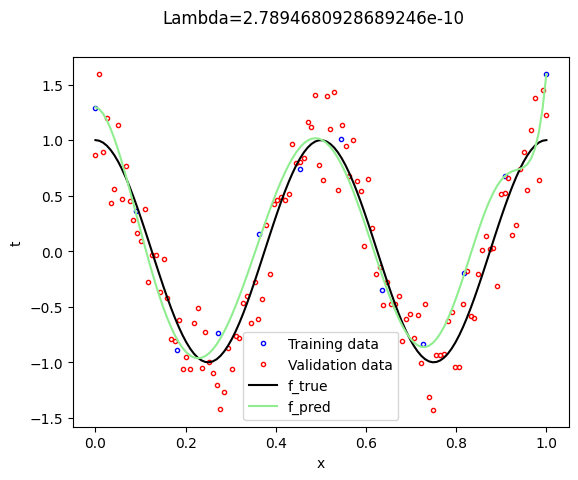

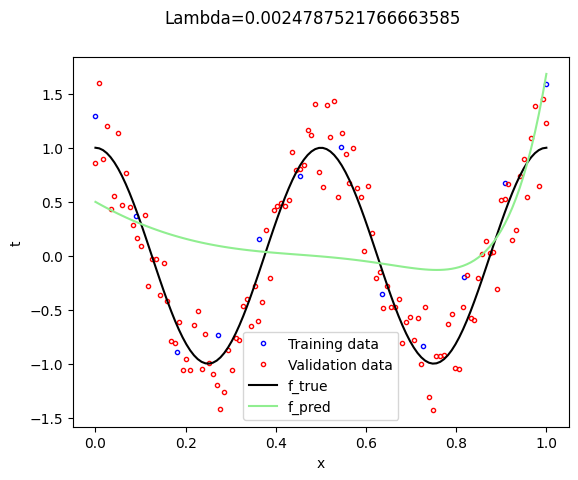

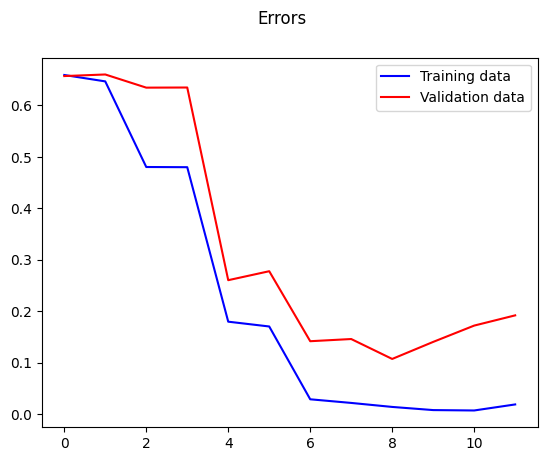

[0.6589533769089917, 0.6465169047840181, 0.4801149272975697, 0.4797380265464926, 0.17947098410994322, 0.17014149636522205, 0.0286165728004393, 0.021555492734786273, 0.013772998229578094, 0.007643504020007825, 0.006879963024276793, 0.018620907611730412]


In [6]:
p = 12
x_train,x_valid,t_train,t_valid = generate_data(p)
ans = {
    "M": [ i for i in range(0,p)],
    "training_error" : [],
    "valid_error" : []
}


for exp in ans["M"]:

    xx_train,xx_valid,tt_train,tt_valid = generate_matrix(x_train,t_train,x_valid,t_valid,exp)
    # print(xx_train.shape)
    # print(xx_valid.shape)
    # print(tt_train.shape)
    # print(tt_valid.shape)
    #print(xx_train)
    w = train(xx_train,t_train)
    print(w)
    train_error, valid_error = calc_error(w,xx_train,tt_train,xx_valid,tt_valid)
    print(f"Degree {exp}: training error = {train_error:22}, validation error = {valid_error}")
    ans["training_error"].append(train_error)
    ans["valid_error"].append(valid_error)
    plot_data(exp, pred(w, xx_valid), x_train, t_train, x_valid, t_valid)

print(f"The lowest training error was at degree {ans['M'][np.argmin(ans['training_error'])]} and the "
          f"lowest validation error was at degree {ans['M'][np.argmin(ans['valid_error'])]}")

print(xx_train[-1,:])
#apply regulation
xx_train = np.delete(xx_train,0,1)
xx_valid = np.delete(xx_valid,0,1)

sc = StandardScaler()
xx_train = sc.fit_transform(xx_train)
xx_valid = sc.transform(xx_valid)
xx_train = np.c_[np.ones(t_train.shape[0]), xx_train]
xx_valid = np.c_[np.ones(t_valid.shape[0]), xx_valid]
regulation = {
    "lamda" : np.exp([i for i in range(-100,-1)]).tolist(),
    "training_error" : [],
    "valid_error" : [],
    "w" : []
}

for lamda in regulation["lamda"]:
    #create lambda
    B = np.zeros((p,p))
    np.fill_diagonal(B, lamda * t_train.shape[0])

    w = train_regulation(xx_train,t_train,B)
    regulation["w"].append(w)
    train_error, valid_error = calc_error_regulation(w,xx_train,tt_train,xx_valid,tt_valid,lamda)
    
    #print(f"lamda: {lamda}: training error = {train_error:22}, validation error = {valid_error}")
    regulation["training_error"].append(train_error) 
    regulation["valid_error"].append(valid_error)

lowest_valid_error = np.argmin(regulation["valid_error"])

lambda1 = regulation['lamda'][lowest_valid_error]
lambda2 = regulation['lamda'][-5]

print(f"The lowest regularised validation error was at constant {lambda1}")

plot_data(lambda1, pred(regulation["w"][lowest_valid_error], xx_valid), x_train, t_train, x_valid,
              t_valid, reg=True)
plot_data(lambda2, pred(regulation["w"][-4], xx_valid), x_train, t_train, x_valid, t_valid,
              reg=True)

plot_error_curves(ans["M"],ans["training_error"],ans["valid_error"])
print(ans["training_error"])
